Having a look at the data

In [1]:
# import packages

import gc
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:20,.2f}'.format # disabling scientific notation in pandas
import ydata_profiling 
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload
%autoreload 2

In [ ]:
#train_df_cat = pd.read_csv("data/train_categorial_features_moda.csv")
#train_df_cat['fullVisitorId'] = train_df_cat['fullVisitorId'].astype(str) 

In [ ]:
#train_df_cat.shape

In [ ]:
#train_df_cat.head()

In [ ]:
#train_df_cat.dtypes

In [2]:
train_df_filter = pd.read_csv("data/train_filtered.csv", dtype={'fullVisitorId':str})
#train_df_filter['fullVisitorId'] = train_df_filter['fullVisitorId'].astype(str)

In [3]:
train_df_filter.shape

(902755, 32)

In [ ]:
train_df_filter.head()

In [ ]:
train_df_filter.dtypes

In [ ]:
#rain_df_flat = pd.read_csv("data/train_flat.csv")
#train_df_flat['fullVisitorId'] = train_df_flat['fullVisitorId'].astype(str)

In [ ]:
#train_df_flat.shape

In [ ]:
#train_df_flat.head()

In [ ]:
#train_df_flat.dtypes

In [ ]:
#train_df_cat.isna().sum()

In [ ]:
train_df_filter.isna().sum() # train_df_filter seems to be the processed data after removing redundant and allegedly less meaningful features

In [ ]:
#train_df_flat.isna().sum()

Note on the values of totals_transactionRevenue: Total transaction revenue is expressed as the value passed to Analytics multiplied by 10^6 (e.g., 2.40 would be given as 2400000).

How many unique visitors did the ecommerce-shop have for the observed period?

In [4]:
unique_customers = train_df_filter.fullVisitorId.nunique()

In [5]:
unique_customers

714167

In [7]:
sum(train_df_filter.totals_transactionRevenue>0)

11512

How many of those generated revenue?

In [8]:
train_df_filter[['fullVisitorId', 'totals_transactionRevenue']].sort_values('totals_transactionRevenue',ascending=False)

,fullVisitorId,totals_transactionRevenue
374904,1957458976293878100,"23,129,500,000.00"
430432,1957458976293878100,"17,855,500,000.00"
380637,5632276788326171571,"16,023,750,000.00"
772974,9417857471295131045,"10,589,140,000.00"
890691,1957458976293878100,"8,677,830,000.00"
...,...,...
302842,6705206951405647737,0.00
302843,0262472272057446420,0.00
302844,3627326284569000152,0.00
302845,0996291448451917297,0.00


In [9]:
rev_by_customer = train_df_filter[['fullVisitorId', 'totals_transactionRevenue']].groupby('fullVisitorId').sum().sort_values('totals_transactionRevenue',ascending=False)

In [10]:
rev_by_customer_real = rev_by_customer.copy()

In [11]:
rev_by_customer

,totals_transactionRevenue
fullVisitorId,
1957458976293878100,"77,113,430,000.00"
5632276788326171571,"16,023,750,000.00"
9417857471295131045,"15,170,120,000.00"
4471415710206918415,"11,211,100,000.00"
4984366501121503466,"9,513,900,000.00"
...,...
3362854807171208318,0.00
3362855878337917591,0.00
336286767069572297,0.00


In [ ]:
rev_by_customer_real.totals_transactionRevenue = rev_by_customer_real.totals_transactionRevenue/(10**6)

In [ ]:
rev_by_customer_real

In [12]:
paying_customers = (rev_by_customer.totals_transactionRevenue > 0).sum()

In [13]:
paying_customers

9994

In [ ]:
conversion_rate = paying_customers/unique_customers
conversion_rate

Only 1.4% of all visitors generate (tracked) revenue (assuming missing values mean no revenue)

In [ ]:
train_df_filter.head()

In [ ]:
train_df_filter.nunique()

We can see that the time period in question are 366 days (not necessarily consecutive ones -- as days in 'dates' where no visits happened would not be recorded)

In [ ]:
#train_df_cat.nunique()

In [ ]:
#train_df_filter.columns.isin(train_df_cat.columns)

In [ ]:
#train_df_filter.iloc[:,train_df_filter.columns.isin(train_df_cat.columns)].nunique()

The "filter and "cat columns do not fully correspond. That is, there is more categorical data in "filter than in "cat, probably because some rows have been dropped in "cat due to too much missing data.

" cat also has helpfully a weekday column.

Probably time of the year might also help -- but then these vary with country (etc.) of which there are 222.

In [ ]:
#train_df_filter.device_operatingSystem.value_counts()

In [ ]:
# pkl = pickle.load('data/data_all_features.pkl')

How many visitors returned?

In [14]:
return_vis = (train_df_filter.fullVisitorId.value_counts() > 1).sum()

In [15]:
return_vis

93020

In [ ]:
return_vis/unique_customers

About 12.5% of all visitors return

In [ ]:
customer_rev_visits = rev_by_customer.copy()

In [ ]:
#customer_rev_visits['fullVisitorId_sort'] = customer_rev_visits.index.astype(float) # to sort by customerID one has to convert them to floats as int formats are too low precision for such high numbers

In [ ]:
customer_rev_visits.sort_values('fullVisitorId', inplace=True)

In [ ]:
customer_rev_visits.reset_index(inplace=True)

In [ ]:
visits = pd.DataFrame(train_df_filter.fullVisitorId.value_counts())

In [ ]:
#visits['fullVisitorId_sort'] = visits.index.astype(float)

In [ ]:
visits.columns = ['visits']

In [ ]:
visits.reset_index(names=['fullVisitorId', 'visits'], inplace=True)

In [ ]:
visits.sort_values('fullVisitorId', inplace=True, ignore_index=True)

In [ ]:
visits

In [ ]:
customer_rev_visits['visits'] = visits['visits']

In [ ]:
customer_rev_visits

In [ ]:
paying_customers_visit = customer_rev_visits.sort_values('totals_transactionRevenue', ascending=False).head(paying_customers)

In [ ]:
paying_returning = (paying_customers_visit['visits'] > 1).sum() # the majority of paying customers are returning visitors

In [ ]:
paying_returning

In [ ]:
paying_returning/paying_customers # 65.17%

In [ ]:
paying_customers

In [ ]:
unique_customers

In [ ]:
returning_no_pay = return_vis - paying_returning

In [ ]:
no_pay_vis = unique_customers - paying_customers

In [ ]:
returning_no_pay/no_pay_vis

Only 11.76% of non-paying visitors return, suggesting that more than one visit (> 1) is a predictor for transactions

Q: Which of these features can be influenced?

channelGrouping                                      8 The Default Channel Group associated with an end user's session for this View.
date                                               366 The date of the session in YYYYMMDD format.
fullVisitorId                                   723854
visitNumber                                        384 The session number for this user. If this is the first session, then this is set to 1.
visitStartTime                                  886276 The timestamp (expressed as POSIX time).
totals_bounces                                       2 Total bounces (for convenience). For a bounced session, the value is 1, otherwise it is null.

Visitors who enter the site and then leave ("bounce") rather than continuing to view other pages within the same site.

totals_hits                                        274 Total number of hits within the session. range: 1-446525

A hit is merely a request for a file from a Web server. A request for a Web page counts as a hit, but so does a request for a graphic on a Web page. Since the number of graphics per page can vary considerably, hits mean very little for comparison purposes.

totals_newVisits                                     2 Total number of new users in session (for convenience). If this is the first visit, this value is 1, otherwise it is null.
totals_pageviews                                   214 Total number of pageviews within the session. -- if it is 1 then bounce is 1 and otherwise 0
totals_transactionRevenue                         5331 Total transaction revenue, expressed as the value passed to Analytics multiplied by 10^6 (e.g., 2.40 would be given as 2400000).
device_browser                                      54 Browser used during visit. Long tail < 10 -- can be summarised as other or so
device_deviceCategory                                3 desktop/mobile/tablet -- some redundancy with browser
device_isMobile                                      2 0/1 - some redundancy with deviceCategory
device_operatingSystem                              20
geoNetwork_city                                    648
geoNetwork_continent                                 6
geoNetwork_country                                 222 The country from which sessions originated, based on IP address.
geoNetwork_metro                                    93 The Designated Market Area (DMA) from which sessions originate.
geoNetwork_networkDomain                         28063 The domain name of user's internet service proviser (ISP), derived from the domain name registered to the ISP's IP address.
geoNetwork_region                                  375
geoNetwork_subContinent                             23
trafficSource_adContent                             45 The ad content of the traffic source. Can be set by the utm_content URL parameter.
trafficSource_adwordsClickInfo.adNetworkType         3 Network Type. Takes one of the following values: {“Google Search", "Content", "Search partners", "Ad Exchange", "Yahoo Japan Search", "Yahoo Japan AFS", “unknown”} -- most are "@", prbbly missing val
trafficSource_adwordsClickInfo.isVideoAd             1 True if it is a Trueview video ad. -- has just one value and is therefore WITHOUT MEANING
trafficSource_adwordsClickInfo.page                  9 Page number in search results where the ad was shown. -- most have missing values? 0? Or is this the first page
trafficSource_adwordsClickInfo.slot                  3 Position of the Ad. Takes one of the following values:{“RHS", "Top"} -- @ is missing data, most are @
trafficSource_campaign                              10 The campaign value. Usually set by the utm_campaign URL parameter. -- most data is missing
trafficSource_isTrueDirect                           2 True if the source of the session was Direct (meaning the user typed the name of your website URL into the browser or came to your site via a bookmark), This field will also be true if 2 successive but distinct sessions have exactly the same campaign details. Otherwise NULL.
trafficSource_keyword                             3659 The keyword of the traffic source, usually set when the trafficSource.medium is "organic" or "cpc". Can be set by the utm_term URL parameter.
trafficSource_medium                                 6 The medium of the traffic source. Could be "organic", "cpc", "referral", or the value of the utm_medium URL parameter.   
trafficSource_referralPath                        1475 If trafficSource.medium is "referral", then this is set to the path of the referrer. (The host name of the referrer is in trafficSource.source.)
trafficSource_source                               380 The source of the traffic source. Could be the name of the search engine, the referring hostname, or a value of the utm_source URL parameter.

In [ ]:
train_df_filter['visitNumber'].value_counts()

In [ ]:
train_df_filter.describe()

In [ ]:
#train_df_flat.nunique()

EDA shows that there is very little correlation between revenue and other variables. This is possibly due to the difference in scale -- revenue is in millions, features are mostly categorical. Let's change the revenue feature.

Looks like most features can be discarded.

Also, data is not aggregated by customer but is session based. This allows, however, to identify features that play a role from session to session in generating revenue.

There also seem to be some duplicates that need to be removed. After checking this, there seem to be no duplicates -- probably the impression comes from the fact that the profiling cannot deal with visitorIds.

In [16]:
train_df_filter['revenue_generated'] = (train_df_filter['totals_transactionRevenue'] > 0).astype(int)

In [18]:
visits_per_country = train_df_filter.geoNetwork_country.value_counts()

In [26]:
visits_revenue_per_country = train_df_filter.reset_index()[['geoNetwork_country', 'index', 'revenue_generated']].groupby('geoNetwork_country').agg({'index':'count', 'revenue_generated': 'sum'}).reset_index().sort_values('index', ascending=False)

In [28]:
visits_revenue_per_country.head(30)

,geoNetwork_country,index,revenue_generated
212,United States,364402,10951
93,India,51050,10
211,United Kingdom,37378,16
36,Canada,25850,190
217,Vietnam,24592,0
204,Turkey,20515,2
199,Thailand,20104,5
75,Germany,19962,8
28,Brazil,19778,10
102,Japan,19670,17


In [29]:
def plotCategoryRateBar(a, b, colName, topN=np.nan):
    if topN == topN: # isNotNan
        vals = b[colName].value_counts()[:topN]
        subA = a.loc[a[colName].isin(vals.index.values), colName]
        df = pd.DataFrame({'All':subA.value_counts() / len(a), 'Revenue':vals / len(b)})
    else:
        df = pd.DataFrame({'All':a[colName].value_counts() / len(a), 'Revenue':b[colName].value_counts() / len(b)})
    df.sort_values('Revenue').plot.barh(colormap='jet')

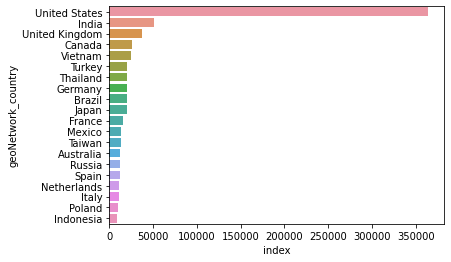

In [36]:
sns.barplot(x="index", y="geoNetwork_country", data=visits_revenue_per_country.head(20), ci=None); 

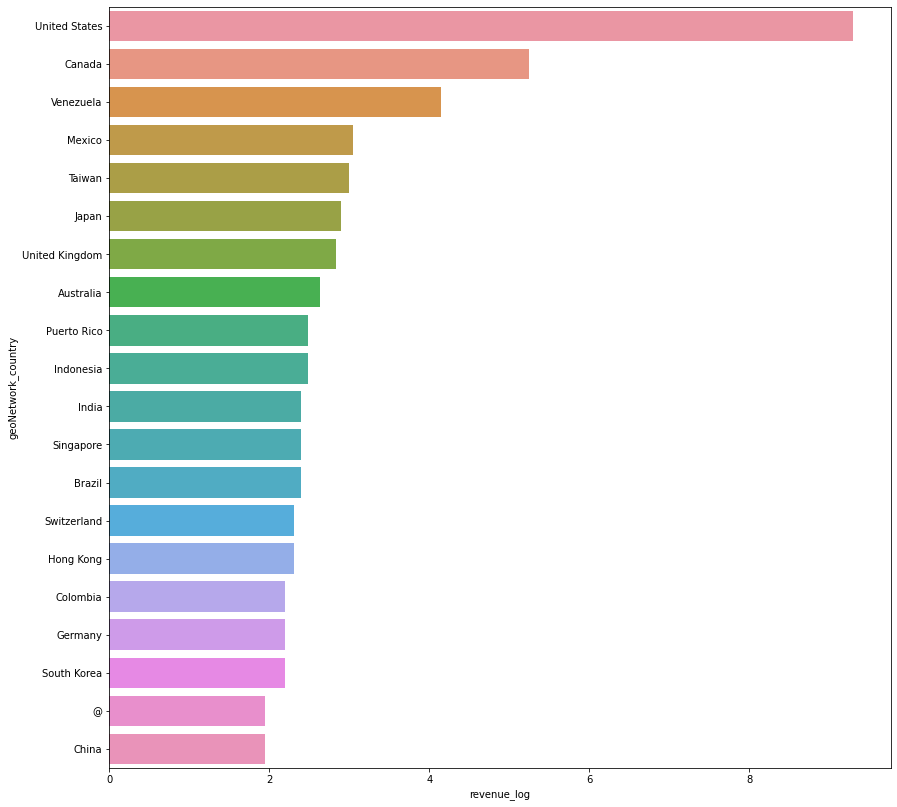

In [57]:
plt.figure(figsize=(14, 14))
sns.barplot(x="revenue_log", y="geoNetwork_country", data=visits_revenue_per_country.sort_values('revenue_generated', ascending=False).head(20), ci=None); 

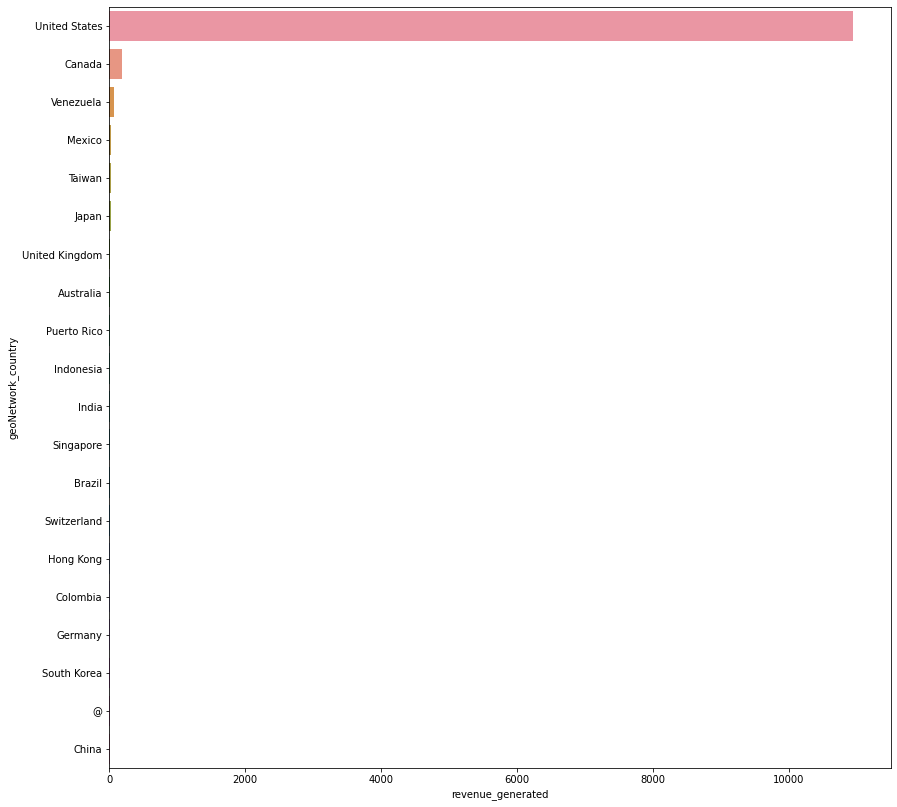

In [58]:
plt.figure(figsize=(14, 14))
sns.barplot(x="revenue_generated", y="geoNetwork_country", data=visits_revenue_per_country.sort_values('revenue_generated', ascending=False).head(20), ci=None); 

In [64]:
visits_revenue_per_country.columns=['country','visits','visits_with_revenue', 'revenue_log']

<Figure size 1008x1008 with 0 Axes>

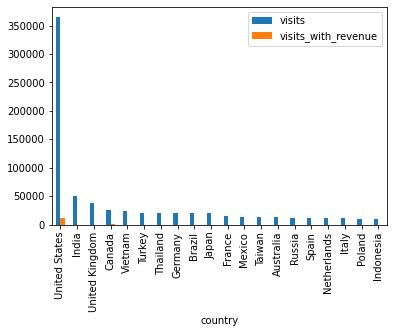

In [69]:
plt.figure(figsize=(14, 14))
visits_revenue_per_country.drop(columns='revenue_log').head(20).plot(x='country',kind="bar");

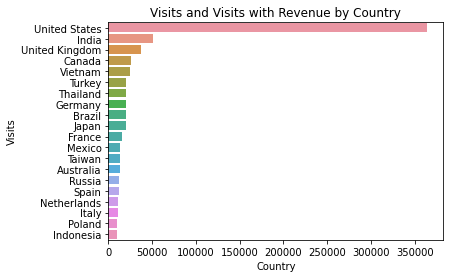

In [79]:
# create the plot
sns.barplot(x='visits', y='country', data=visits_revenue_per_country.head(20), orient="h")
sns.barplot(x='visits_with_revenue', y='country', data=visits_revenue_per_country.head(20), orient="h")

# add labels and title
plt.xlabel('Country')
plt.ylabel('Visits')
plt.title('Visits and Visits with Revenue by Country')

# show the plot
plt.show()

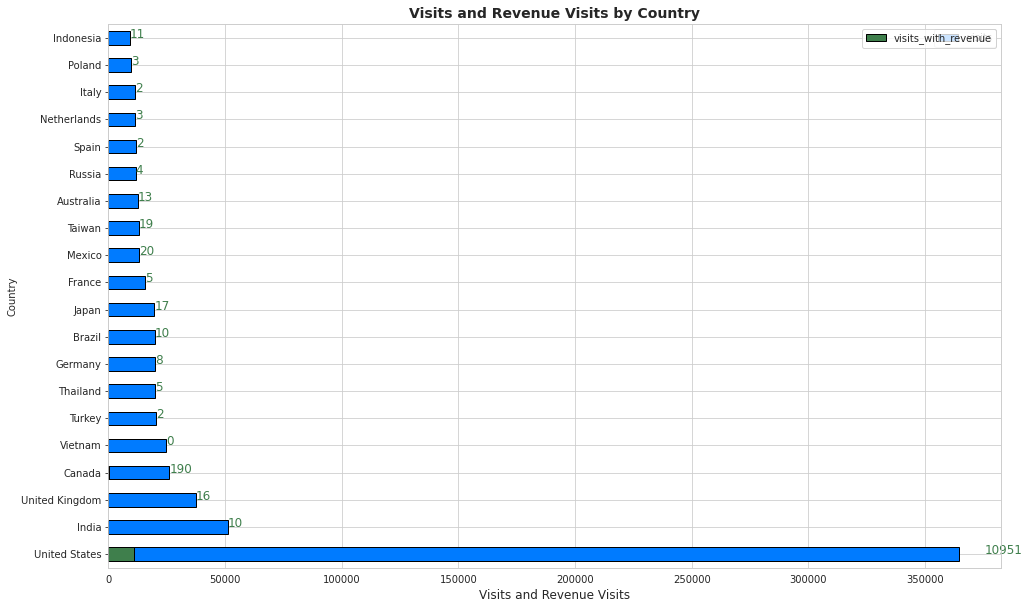

In [129]:
fig, ax = plt.subplots(figsize=(16, 10))

top20 = visits_revenue_per_country.head(20).sort_values('visits', ascending=False).reset_index()

# create the first plot
top20.plot.barh(x='country', y='visits', ax=ax, color='#007bff', edgecolor='black')

# create the second plot with a separate X axis
ax2 = ax.twinx()
top20.plot.barh(x='country', y='visits_with_revenue', color='#3F7F4C', ax=ax2, edgecolor='black')

ax2.set_yticklabels([])
ax2.set_yticks([])
ax2.set_ylabel(None)

# add labels and title
ax.set_xlabel('Visits and Revenue Visits', fontsize=12)
ax.set_ylabel('Country')
ax.set_title('Visits and Revenue Visits by Country', fontsize=14, fontweight='bold')
ax2.set_xlabel('Revenue Visits')

# set background style
sns.set_style("whitegrid")

# add values to bars
for i, (value, name) in enumerate(zip(top20['visits_with_revenue'], top20['country'])):
    ax.text(value + top20['visits'][i] + 5, i, str(value), color='#3F7F4C', fontsize=12)


# save the plot as a PNG file
#plt.savefig('visits_revenue_visits.png', dpi=300, bbox_inches='tight')

# show the plot
plt.show()


In [114]:
summary = pd.DataFrame({'features': ['visits_total', 'visits_with_revenue', 'unique_visitors', 'returning_visitors', 'paying_visitors'], 'count': [902755, 11512, 714167, return_vis, paying_customers]})

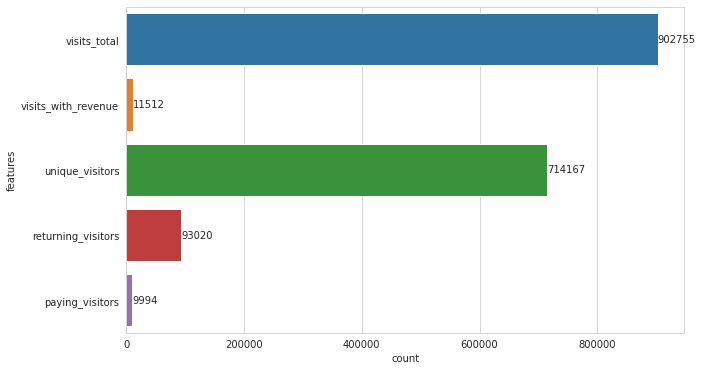

In [126]:
#sns.barplot(x='count', y='features', data=summary, orient='h')

plt.figure(figsize=(10, 6))

ax = sns.barplot(x='count', y='features', data=summary, orient='h')

# add the values for count to the plot
for i in range(len(summary)):
    count = summary.loc[i, 'count']
    ax.text(count, i, count, ha='left', va='center')
    
# save the plot as a PNG file
plt.savefig('summary.png', dpi=300, bbox_inches='tight')

# show the plot
plt.show()

In [101]:
visits_revenue_per_country.sort_values('visits_with_revenue', ascending=False).head(10)

,country,visits,visits_with_revenue,revenue_log
212,United States,364402,10951,9.30
36,Canada,25850,190,5.25
216,Venezuela,2128,62,4.14
132,Mexico,13220,20,3.04
196,Taiwan,12950,19,3.00
102,Japan,19670,17,2.89
211,United Kingdom,37378,16,2.83
12,Australia,12686,13,2.64
161,Puerto Rico,731,11,2.48
94,Indonesia,9266,11,2.48


In [ ]:
train_df_filter['revenue_amount'] = train_df_filter['totals_transactionRevenue']/(10**6)

In [ ]:
train_df_filter.drop(columns='totals_transactionRevenue', inplace=True)

In [130]:
corr = train_df_filter.corr()

/tmp/ipykernel_3150/1608435210.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_df_filter.corr()


In [131]:
corr

,date,visitNumber,visitStartTime,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_transactionRevenue,device_isMobile,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adwordsClickInfo.page,trafficSource_isTrueDirect,revenue_generated
date,1.00,0.01,0.88,0.00,-0.02,-0.04,-0.01,0.00,0.15,NaN,0.02,0.08,0.01
visitNumber,0.01,1.00,0.00,-0.02,0.04,-0.26,0.04,0.05,-0.04,NaN,0.00,0.18,0.02
visitStartTime,0.88,0.00,1.00,-0.00,-0.03,-0.04,-0.02,0.00,0.14,NaN,0.03,0.07,0.01
totals_bounces,0.00,-0.02,-0.00,1.00,-0.37,0.08,-0.40,-0.03,0.02,NaN,-0.05,-0.04,-0.11
totals_hits,-0.02,0.04,-0.03,-0.37,1.00,-0.12,0.98,0.15,-0.03,NaN,0.04,0.08,0.37
totals_newVisits,-0.04,-0.26,-0.04,0.08,-0.12,1.00,-0.12,-0.04,0.02,NaN,-0.04,-0.62,-0.11
totals_pageviews,-0.01,0.04,-0.02,-0.40,0.98,-0.12,1.00,0.16,-0.03,NaN,0.04,0.08,0.40
totals_transactionRevenue,0.00,0.05,0.00,-0.03,0.15,-0.04,0.16,1.00,-0.02,NaN,0.00,0.03,0.28
device_isMobile,0.15,-0.04,0.14,0.02,-0.03,0.02,-0.03,-0.02,1.00,NaN,0.08,0.08,-0.05
trafficSource_adwordsClickInfo.isVideoAd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# eda = train_df_class.profile_report()
# eda

In [ ]:
#correlations = eda.description_set["correlations"]

In [ ]:
#correlations['auto']

In [ ]:
train_df_filter.drop(columns='trafficSource_adwordsClickInfo.isVideoAd', inplace=True) ## ADD TO PREPROCESSING. Feature has a constant value and has thus no value

In [ ]:
train_df_filter.drop_duplicates(ignore_index=True).shape ## ADD TO PREPROCESSING -- there are no duplicates

In [ ]:
#eda1 = train_df_filter.drop(columns='fullVisitorId').profile_report()
#eda1

Now, taking IDs into account, there are no duplicates.

How do the values change for a customer over visits?

In [ ]:
train_df_filter[train_df_filter['fullVisitorId']=='4471415710206918415'] 

For this customer, for instance, most visits were without transactions and were referrals from google mails or mall.googleplex

In [ ]:
#train_df_filter['fullVisitorId'].astype(str).sort_values() ## some of the ids were previously strings and some were ints, this is why sort did not work, converting everything to strings solves the sorting problem

__DONE__ __To Do__: add Id-> string to initial preprocessing

In [ ]:
#eda1.to_file('/home/slawa/code/code-rep0/projects/GA_revenue_analytics/eda_train_df_filter.html')

In [ ]:
train_df_filter[train_df_filter['totals_pageviews']==0]

In [ ]:
train_df_filter['trafficSource_keyword'].value_counts().head(20) #--> can be dropped and has high cardinality

In [ ]:
train_df_filter['geoNetwork_networkDomain'].value_counts().head(20) #--> high cardinality, can be dropped

In [ ]:
#train_df_filter['fullVisitorId', 'country'].groupby('country')

In [ ]:
#visitor_country = train_df_filter[['fullVisitorId', 'geoNetwork_country','revenue_generated']].groupby('fullVisitorId').agg(country=('geoNetwork_country', 'unique'), 
                                                                                                                                 #paying_visitors=('revenue_generated', 'sum'))
#.groupby('geoNetwork_country').agg(unique_visitors=('fullVisitorId', 'count'), 
#                                                                                                                                 paying_visitors=('revenue_generated', 'sum'))

Revenue per customer per country

__To Do__: would also be interesting to see amount spent

In [ ]:
# visitor_country = train_df_filter[['fullVisitorId', 'geoNetwork_country','revenue_generated']].groupby('fullVisitorId').agg(country=('geoNetwork_country', pd.Series.mode), 
#                                                                                                                                  paying_visitors=('revenue_generated', 'sum'))

# visitor_country.reset_index(inplace=True)

# visitor_country

# visitor_country['country'] = visitor_country['country'].astype(str) 
# # that was the crucial step again, as country was in some cases where several countries were concerned an array. How is this possible with mode? Because several entries were equally frequent

In [ ]:
# visitor_country

In [ ]:
#path = !pwd

In [ ]:
#visitor_country.to_csv(f'{path[0]}/data/visitor_country.csv')

In [ ]:
# visitors_by_country = visitor_country.groupby('country').agg(unique_visitors=('fullVisitorId', 'count'), 
#                                        paying_visitors=('paying_visitors', 'sum'))

# visitors_by_country['conversion'] = (visitors_by_country['paying_visitors']/visitors_by_country['unique_visitors'])*100

In [ ]:
#visitors_by_country.to_csv(f'{path[0]}/data/visitors_by_country.csv')

In [ ]:
visitor_country = pd.read_csv('data/visitor_country.csv')
visitor_country['country'] = visitor_country['country'].astype(str) 

In [ ]:
visitors_by_country = pd.read_csv('data/visitors_by_country.csv') # no string conversion of country necessary?

In [ ]:
visitors_by_country[visitors_by_country['paying_visitors']>0].sort_values('conversion',ascending=False).head(50)

Revenue per visit by country

In [ ]:
visit_rev_country = train_df_filter[['fullVisitorId', 'geoNetwork_country','revenue_generated']].groupby('geoNetwork_country').agg(unique_visitors=('fullVisitorId', 'count'), 
                                                                                                                                 paying_visitors=('revenue_generated', 'sum'))

In [ ]:
visit_rev_country

In [ ]:
paying_visitors_country = visit_rev_country[visit_rev_country['paying_visitors']>0]

In [ ]:
paying_visitors_country['conversion'] = (visit_rev_country['paying_visitors']/visit_rev_country['unique_visitors'])*100

In [ ]:
paying_visitors_country.sort_values('conversion', ascending=False).head(15)

In [ ]:
visit_rev_country['unique_visitors'].sum()

How much time passes between visits?

In [132]:
train_df_filter.date = pd.to_datetime(train_df_filter.date, format='%Y%m%d')

In [134]:
train_df_filter['days_since_visit'] = np.nan

Some visit numbers are missing

In [ ]:
visits_per_visitor = train_df_filter['fullVisitorId'].value_counts() 

In [ ]:
visits_per_visitor = visits_per_visitor.reset_index()

In [ ]:
visits_per_visitor.columns = ['fullVisitorId', 'visits']

In [ ]:
returning_visitors = visits_per_visitor[visits_per_visitor['visits']>1]

In [ ]:
returning_visitors

In [ ]:
train_df_filter.head()

In [135]:
visit_dates = train_df_filter[['fullVisitorId', 'date', 'days_since_visit']]

In [ ]:
visit_dates = visit_dates.sort_values(['fullVisitorId', 'date'])

In [ ]:
visit_dates[['last_visit_id', 'last_visit_date']] = visit_dates.shift(+1)[['fullVisitorId', 'date']]

In [ ]:
def calc_days_since_visit(row):
    if row['fullVisitorId'] == row['last_visit_id']:
        return (row['date'] - row['last_visit_date']).days
    else:
        return np.nan

visit_dates['days_since_visit'] = visit_dates.apply(calc_days_since_visit, axis=1)

In [ ]:
visit_dates[visit_dates.days_since_visit.notna()]

In [ ]:
visit_dates.sort_index(inplace=True)

In [ ]:
train_df_filter.days_since_visit = visit_dates.days_since_visit

In [ ]:
train_df_filter

In [ ]:
train_df_filter.dtypes

In [ ]:
visits_per_visitor

In [ ]:
avg_visit_window = train_df_filter[['fullVisitorId', 'days_since_visit']].groupby('fullVisitorId').mean()

In [ ]:
avg_visit_window[avg_visit_window.days_since_visit.notna()].sort_values('days_since_visit').iloc[60000:60020]

In [ ]:
avg_visit_window[avg_visit_window.index=='3269834865385146569']

In [ ]:
train_df_filter[train_df_filter.fullVisitorId=='3269834865385146569']

In [ ]:
slim_df = avg_visit_window.copy()

In [ ]:
avg_visit_window

In [ ]:
slim_df.reset_index(inplace=True)

In [ ]:
slim_df['visits'] = visits_per_visitor.sort_values('fullVisitorId').reset_index().visits

In [ ]:
slim_df['paying'] = visitor_country['paying_visitors']

In [ ]:
slim_df

In [ ]:
visits_per_visitor.sort_values('fullVisitorId').reset_index().visits

In [ ]:
slim_df.set_index('fullVisitorId', inplace=True)

In [ ]:
# this function essentially bins the delays
def calc_delay(row):
    if np.isnan(row['days_since_visit']):
        return 'not returned'
    if row['days_since_visit'] < 7.0:
        return 'after < 7 days'
    if row['days_since_visit'] < 14.0:
        return 'after < 14 days'
    if row['days_since_visit'] <= 30.0:
        return 'after <= 30 days'
    if row['days_since_visit'] > 30.0:
        return 'after > 30 days'

In [ ]:
slim_df['delay'] = slim_df.apply(calc_delay, axis=1)

In [ ]:
slim_df

In [ ]:
slim_df.profile_report()

In [ ]:
train_df_filter.head()

In [ ]:
train_df_filter.dtypes

In [ ]:
train_df_reduced.profile_report()

In [ ]:
train_df_filter.head()

In [ ]:
train_df_filter['date_time'] = pd.to_datetime(train_df_filter['visitStartTime'], unit='s')

In [ ]:
train_df_filter.head()

In [ ]:
#df['date'] = pd.to_datetime(df['visitStartTime'], unit='s')
train_df_filter['date_dow'] = train_df_filter['date_time'].dt.dayofweek
train_df_filter['date_hours'] = train_df_filter['date_time'].dt.hour
train_df_filter['date_dom'] = train_df_filter['date_time'].dt.day

In [ ]:
train_df_filter['month'] = train_df_filter['date_time'].dt.month

In [ ]:
# https://www.kaggle.com/prashantkikani/teach-lightgbm-to-sum-predictions-fe
def browser_mapping(x):
    browsers = ['chrome','safari','firefox','internet explorer','edge','opera','coc coc','maxthon','iron']
    if x in browsers:
        return x.lower()
    elif  ('android' in x) or ('samsung' in x) or ('mini' in x) or ('iphone' in x) or ('in-app' in x) or ('playstation' in x):
        return 'mobile browser'
    elif  ('mozilla' in x) or ('chrome' in x) or ('blackberry' in x) or ('nokia' in x) or ('browser' in x) or ('amazon' in x):
        return 'mobile browser'
    elif  ('lunascape' in x) or ('netscape' in x) or ('blackberry' in x) or ('konqueror' in x) or ('puffin' in x) or ('amazon' in x):
        return 'mobile browser'
    elif '(not set)' in x:
        return x
    else:
        return 'others'
    
    
def adcontents_mapping(x):
    if  ('google' in x):
        return 'google'
    elif  ('placement' in x) | ('placememnt' in x):
        return 'placement'
    elif '(not set)' in x or 'nan' in x:
        return x
    elif 'ad' in x:
        return 'ad'
    else:
        return 'others'
    
def source_mapping(x):
    if  ('google' in x):
        return 'google'
    elif  ('youtube' in x):
        return 'youtube'
    elif '(not set)' in x or 'nan' in x:
        return x
    elif 'yahoo' in x:
        return 'yahoo'
    elif 'facebook' in x:
        return 'facebook'
    elif 'reddit' in x:
        return 'reddit'
    elif 'bing' in x:
        return 'bing'
    elif 'quora' in x:
        return 'quora'
    elif 'outlook' in x:
        return 'outlook'
    elif 'linkedin' in x:
        return 'linkedin'
    elif 'pinterest' in x:
        return 'pinterest'
    elif 'ask' in x:
        return 'ask'
    elif 'siliconvalley' in x:
        return 'siliconvalley'
    elif 'lunametrics' in x:
        return 'lunametrics'
    elif 'amazon' in x:
        return 'amazon'
    elif 'mysearch' in x:
        return 'mysearch'
    elif 'qiita' in x:
        return 'qiita'
    elif 'messenger' in x:
        return 'messenger'
    elif 'twitter' in x:
        return 'twitter'
    elif 't.co' in x:
        return 't.co'
    elif 'vk.com' in x:
        return 'vk.com'
    elif 'search' in x:
        return 'search'
    elif 'edu' in x:
        return 'edu'
    elif 'mail' in x:
        return 'mail'
    elif 'ad' in x:
        return 'ad'
    elif 'golang' in x:
        return 'golang'
    elif 'direct' in x:
        return 'direct'
    elif 'dealspotr' in x:
        return 'dealspotr'
    elif 'sashihara' in x:
        return 'sashihara'
    elif 'phandroid' in x:
        return 'phandroid'
    elif 'baidu' in x:
        return 'baidu'
    elif 'mdn' in x:
        return 'mdn'
    elif 'duckduckgo' in x:
        return 'duckduckgo'
    elif 'seroundtable' in x:
        return 'seroundtable'
    elif 'metrics' in x:
        return 'metrics'
    elif 'sogou' in x:
        return 'sogou'
    elif 'businessinsider' in x:
        return 'businessinsider'
    elif 'github' in x:
        return 'github'
    elif 'gophergala' in x:
        return 'gophergala'
    elif 'yandex' in x:
        return 'yandex'
    elif 'msn' in x:
        return 'msn'
    elif 'dfa' in x:
        return 'dfa'
    elif '(not set)' in x:
        return '(not set)'
    elif 'feedly' in x:
        return 'feedly'
    elif 'arstechnica' in x:
        return 'arstechnica'
    elif 'squishable' in x:
        return 'squishable'
    elif 'flipboard' in x:
        return 'flipboard'
    elif 't-online.de' in x:
        return 't-online.de'
    elif 'sm.cn' in x:
        return 'sm.cn'
    elif 'wow' in x:
        return 'wow'
    elif 'baidu' in x:
        return 'baidu'
    elif 'partners' in x:
        return 'partners'
    else:
        return 'others'

train_df_filter['device_browser'] = train_df_filter['device_browser'].map(lambda x:browser_mapping(str(x).lower())).astype('str')
train_df_filter['trafficSource_adContent'] = train_df_filter['trafficSource_adContent'].map(lambda x:adcontents_mapping(str(x).lower())).astype('str')
train_df_filter['trafficSource_source'] = train_df_filter['trafficSource_source'].map(lambda x:source_mapping(str(x).lower())).astype('str')

In [ ]:
train_df_filter.head()

In [ ]:
def process_device(data_df):
    print("process device ___")
    data_df['source_country'] = data_df['trafficSource_source'] + '_' + data_df['geoNetwork_country']
    data_df['campaign_medium'] = data_df['trafficSource_campaign'] + '_' + data_df['trafficSource_medium']
    data_df['browser_category'] = data_df['device_browser'] + '_' + data_df['device_deviceCategory']
    data_df['browser_os'] = data_df['device_browser'] + '_' + data_df['device_operatingSystem']
    return data_df

train = process_device(train)
test = process_device(test)

def custom(data):
    print('custom__')
    data['device_deviceCategory_channelGrouping'] = data['device_deviceCategory'] + "_" + data['channelGrouping']
    data['channelGrouping_browser'] = data['device_browser'] + "_" + data['channelGrouping']
    data['channelGrouping_OS'] = data['device_operatingSystem'] + "_" + data['channelGrouping']
    
    for i in ['geoNetwork_city', 'geoNetwork_continent', 'geoNetwork_country','geoNetwork_metro', 'geoNetwork_networkDomain', 'geoNetwork_region','geoNetwork_subContinent']:
        for j in ['device_browser','device_deviceCategory', 'device_operatingSystem', 'trafficSource_source']:
            data[i + "_" + j] = data[i] + "_" + data[j]
    
    data['content_source'] = data['trafficSource_adContent'] + "_" + data['source_country']
    data['medium_source'] = data['trafficSource_medium'] + "_" + data['source_country']
    return data

train = custom(train)
test = custom(test)

In [ ]:
def plotCategoryRateBar(a, b, colName, topN=np.nan):
    if topN == topN: # isNotNan
        vals = b[colName].value_counts()[:topN]
        subA = a.loc[a[colName].isin(vals.index.values), colName]
        df = pd.DataFrame({'All':subA.value_counts() / len(a), 'Revenue':vals / len(b)})
    else:
        df = pd.DataFrame({'All':a[colName].value_counts() / len(a), 'Revenue':b[colName].value_counts() / len(b)})
    df.sort_values('Revenue').plot.barh(colormap='jet')

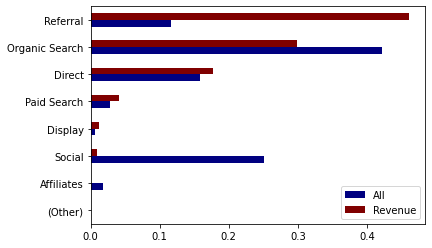

In [30]:
plotCategoryRateBar(train_df_filter, train_df_filter[train_df_filter.revenue_generated==1], 'channelGrouping')

In [ ]:
train_df_filter.shape

In [ ]:
pd.factorize